In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

# Rainfall analysis - How to test a feeling

I was whatsapping with a friend of mine the other day, and when it comes with people you don't listen for a while, we made a comment about the weather. Mine was "is going to be a dry year, there has been so few rainy day that I am expecting a drought this year". They immediately replaied with "Puglia, Italy, has always had a higher quantity of rainfall with respect to London" before commenting about the weather in the region where they are currently living. And yes, I really enjoy and value having nerds friends.

Later that day, I started researching about rainfall data in London, South of England, Puglia and South of Italy to verify if my feeling was true or just a feeling, and I stumbled to the core question: "how can I demontrate a feeling?" No surprise, I had to shift to a more mundane "how I test a feeling?". In the next section of this notebook, I will discuss some findings about my research.

In [2]:
data = pd.read_csv('./data/south_east_rainfall.csv',
                   sep=',')

data.columns = data.columns.str.strip()
string_columns = data.select_dtypes(include=['object']).columns
data[string_columns] = data[string_columns].apply(pd.to_numeric, errors='coerce')
data_melt = data[['year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep','oct', 'nov', 'dec']].melt(id_vars='year',var_name='month', value_name='value').sort_values(by='year')
data_melt['month'] = pd.Categorical(data_melt['month'], categories=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], ordered=True)

In [26]:
data_melt.head()

,year,month,value,season,decade,decade num
0,1836,jan,63.0,winter,1830s,1830
190,1836,feb,52.9,winter,1830s,1830
380,1836,mar,103.6,spring,1830s,1830
570,1836,apr,69.7,spring,1830s,1830
760,1836,may,16.1,spring,1830s,1830


In [3]:
yearly_aggregate = (data_melt
                    .groupby(['year'])
                    .agg(
                        mean_value=('value', 'mean'),
                        median_value=('value', 'median'),
                        std_value=('value', 'std'),
                        min_value=('value', 'min'),
                        max_value=('value', 'max')
                        )
                        ).reset_index()
yearly_aggregate.head()

,year,mean_value,median_value,std_value,min_value,max_value
0,1836,68.625000,61.80,29.269380,16.1,121.3
1,1837,56.933333,56.80,20.707106,23.3,93.1
2,1838,58.591667,53.85,26.424591,19.6,119.1
3,1839,73.933333,72.45,30.584320,27.5,116.3
4,1840,50.875000,49.90,31.935478,7.9,119.7


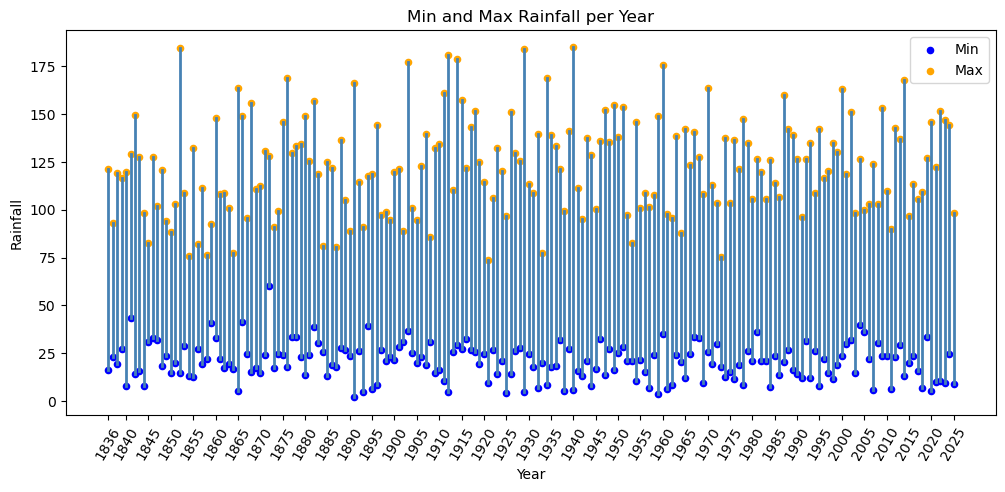

In [4]:
fig, ax = plt.subplots(figsize=(12, 5))

# Plot vertical bars (lines) connecting min and max
for idx, row in yearly_aggregate.iterrows():
    ax.plot([row['year'], row['year']], [row['min_value'], row['max_value']], color='steelblue', linewidth=2);
    ax.scatter([row['year']], [row['min_value']], color='blue', s = 20, label='Min' if idx == 0 else "");
    ax.scatter([row['year']], [row['max_value']], color='orange', s = 20, label='Max' if idx == 0 else "");

# Labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Rainfall')
ax.set_title('Min and Max Rainfall per Year')
ax.legend()

start_year = yearly_aggregate['year'].min()
end_year = yearly_aggregate['year'].max()

# Generate ticks: start at 1836, go every 5 years, include last year if needed
# xticks = list(np.arange(start_year, end_year + 1, 5));
xticks = [1836] + list(np.arange(1840, 2030, 5));
if end_year not in xticks:
    xticks.append(end_year);

plt.xticks(xticks, rotation=60);

# plt.xticks(yearly_aggregate['year'], rotation = 60);  # Ensure all years are shown on x-axis

In [25]:
yearly_aggregate

,year,mean_value,median_value,std_value,min_value,max_value
0,1836,68.625000,61.80,29.269380,16.1,121.3
1,1837,56.933333,56.80,20.707106,23.3,93.1
2,1838,58.591667,53.85,26.424591,19.6,119.1
3,1839,73.933333,72.45,30.584320,27.5,116.3
4,1840,50.875000,49.90,31.935478,7.9,119.7
...,...,...,...,...,...,...
185,2021,67.191667,62.10,35.869649,10.3,122.3
186,2022,59.158333,45.90,39.801952,10.7,151.5
187,2023,82.750000,78.10,41.641446,9.3,146.9
188,2024,81.366667,77.85,35.730362,24.8,144.4


In [5]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Sample data
# data = {
#     'year': [1983, 1984, 1985],
#     'min': [3, 2, 4],
#     'max': [8, 9, 10]
# }
# df = pd.DataFrame(data)

# # Plot
# fig, ax = plt.subplots(figsize=(8, 5))

# # Plot vertical bars (lines) connecting min and max
# for idx, row in df.iterrows():
#     ax.plot([row['year'], row['year']], [row['min'], row['max']], color='blue', linewidth=2)
#     ax.scatter([row['year']], [row['min']], color='green', label='Min' if idx == 0 else "")
#     ax.scatter([row['year']], [row['max']], color='red', label='Max' if idx == 0 else "")

# # Labels and legend
# ax.set_xlabel('Year')
# ax.set_ylabel('Rainfall')
# ax.set_title('Min and Max Rainfall per Year')
# ax.legend()
# plt.xticks(df['year'])  # Ensure all years are shown on x-axis
# plt.tight_layout()
# plt.show()

In [6]:

data.head()

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
0,1836,63.0,52.9,103.6,69.7,16.1,52.6,60.6,43.3,80.9,102.4,121.3,57.1,NaN,189.4,156.5,304.5,823.4
1,1837,79.0,80.1,23.3,42.8,29.7,42.9,53.5,93.1,53.2,65.2,60.1,60.3,216.3,95.8,189.5,178.5,683.3
2,1838,19.6,62.9,38.3,36.5,45.7,92.5,50.7,49.0,65.1,66.7,119.1,57.0,142.8,120.6,192.2,250.9,703.1
3,1839,48.2,50.7,55.2,38.9,27.5,96.4,115.5,65.7,106.4,79.2,116.3,87.2,155.8,121.7,277.6,301.9,887.2
4,1840,83.2,52.2,7.9,12.4,63.3,39.0,60.1,47.6,69.1,41.0,119.7,15.0,222.6,83.6,146.7,229.9,610.6


In [7]:
data.dtypes

year      int64
jan     float64
feb     float64
mar     float64
apr     float64
may     float64
jun     float64
jul     float64
aug     float64
sep     float64
oct     float64
nov     float64
dec     float64
win     float64
spr     float64
sum     float64
aut     float64
ann     float64
dtype: object

In [8]:
# For specific columns only
string_columns = data.select_dtypes(include=['object']).columns
string_columns
# df[string_columns] = df[string_columns].apply(pd.to_numeric, errors='coerce')

Index([], dtype='object')

In [9]:

data.head()

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
0,1836,63.0,52.9,103.6,69.7,16.1,52.6,60.6,43.3,80.9,102.4,121.3,57.1,NaN,189.4,156.5,304.5,823.4
1,1837,79.0,80.1,23.3,42.8,29.7,42.9,53.5,93.1,53.2,65.2,60.1,60.3,216.3,95.8,189.5,178.5,683.3
2,1838,19.6,62.9,38.3,36.5,45.7,92.5,50.7,49.0,65.1,66.7,119.1,57.0,142.8,120.6,192.2,250.9,703.1
3,1839,48.2,50.7,55.2,38.9,27.5,96.4,115.5,65.7,106.4,79.2,116.3,87.2,155.8,121.7,277.6,301.9,887.2
4,1840,83.2,52.2,7.9,12.4,63.3,39.0,60.1,47.6,69.1,41.0,119.7,15.0,222.6,83.6,146.7,229.9,610.6


In [10]:
data_melt = data[['year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep','oct', 'nov', 'dec']].melt(id_vars='year',var_name='month', value_name='value').sort_values(by='year')
data_melt.head()

,year,month,value
0,1836,jan,63.0
570,1836,apr,69.7
380,1836,mar,103.6
1330,1836,aug,43.3
1900,1836,nov,121.3


In [11]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
    

In [12]:
data_melt['month'] = pd.Categorical(data_melt['month'], categories=months, ordered=True)

In [13]:
data_melt.sort_values(by=['year', 'month'], inplace=True)
data_melt.head()

,year,month,value
0,1836,jan,63.0
190,1836,feb,52.9
380,1836,mar,103.6
570,1836,apr,69.7
760,1836,may,16.1


In [14]:
conds=[
    data_melt['month'].isin(['mar', 'apr', 'may']),
    data_melt['month'].isin(['jun', 'jul', 'aug']),
    data_melt['month'].isin(['sep', 'oct', 'nov']),
    data_melt['month'].isin(['dec', 'jan', 'feb'])
]
choices=['spring', 'summer', 'autumn', 'winter']
data_melt['season'] = np.select(conds, choices, default='unknown')

In [15]:
# Define decade bins
bins = list(range(1830, 2040, 10))  # Adjust range as needed
labels = [f"{year}s" for year in bins[:-1]]
num_labels = [year for year in bins[:-1]]

In [16]:
data_melt['decade'] = pd.cut(data_melt['year'],
                        bins=bins,
                        labels=labels,
                        right=False)


In [17]:
data_melt['decade num'] = pd.cut(data_melt['year'],
                        bins=bins,
                        labels=num_labels,
                        right=False)

In [18]:
data_melt.head()

,year,month,value,season,decade,decade num
0,1836,jan,63.0,winter,1830s,1830
190,1836,feb,52.9,winter,1830s,1830
380,1836,mar,103.6,spring,1830s,1830
570,1836,apr,69.7,spring,1830s,1830
760,1836,may,16.1,spring,1830s,1830


In [19]:
rainfall_decade_season = (data_melt
 .groupby(['decade num', 'season'])
 .agg(mean_value=('value', 'mean'),
      median_value=('value', 'median'),
      std_value=('value', 'std'),
      min_value=('value', 'min'),
      max_value=('value', 'max')
 )
 .reset_index()
)

C:\Users\pacor\AppData\Local\Temp\ipykernel_18632\3549958899.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['decade num', 'season'])


In [20]:
rainfall_decade_season.head()

,decade num,season,mean_value,median_value,std_value,min_value,max_value
0,1830,autumn,86.325000,80.05,25.234325,53.2,121.3
1,1830,spring,43.941667,38.60,23.627352,16.1,103.6
2,1830,summer,67.983333,57.05,24.681455,42.9,115.5
3,1830,winter,59.833333,58.70,17.703946,19.6,87.2
4,1840,autumn,81.313333,77.40,34.285392,21.0,149.4


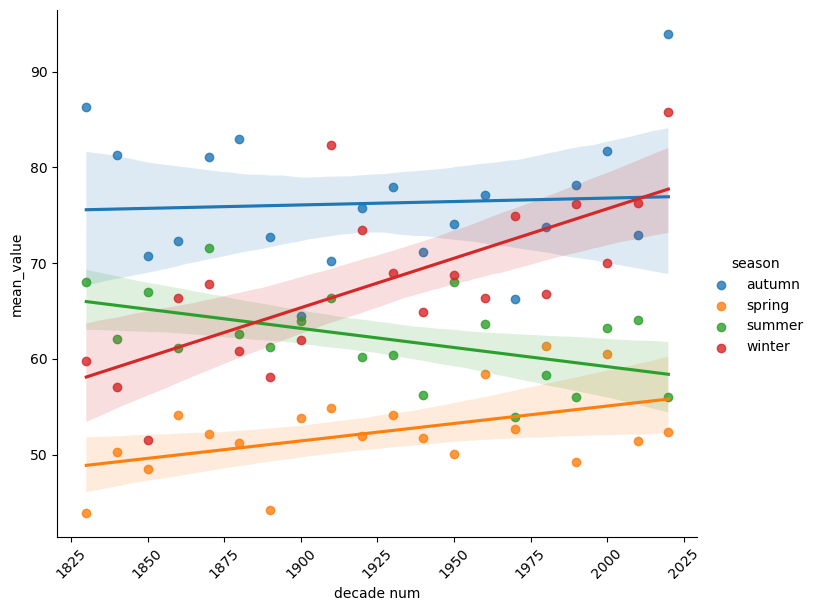

In [21]:
sns.lmplot(data=rainfall_decade_season, 
           x='decade num', 
           y='mean_value', 
           hue='season', 
           height=6, aspect=1.2)
plt.xticks(rotation=45)
plt.show()

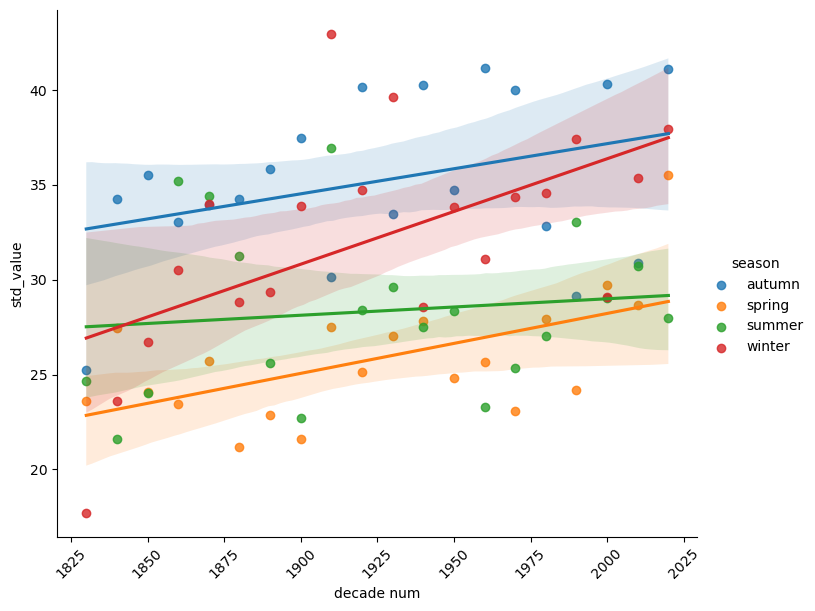

In [22]:
sns.lmplot(data=rainfall_decade_season, 
           x='decade num', 
           y='std_value', 
           hue='season', 
           height=6, aspect=1.2)
plt.xticks(rotation=45)
plt.show()

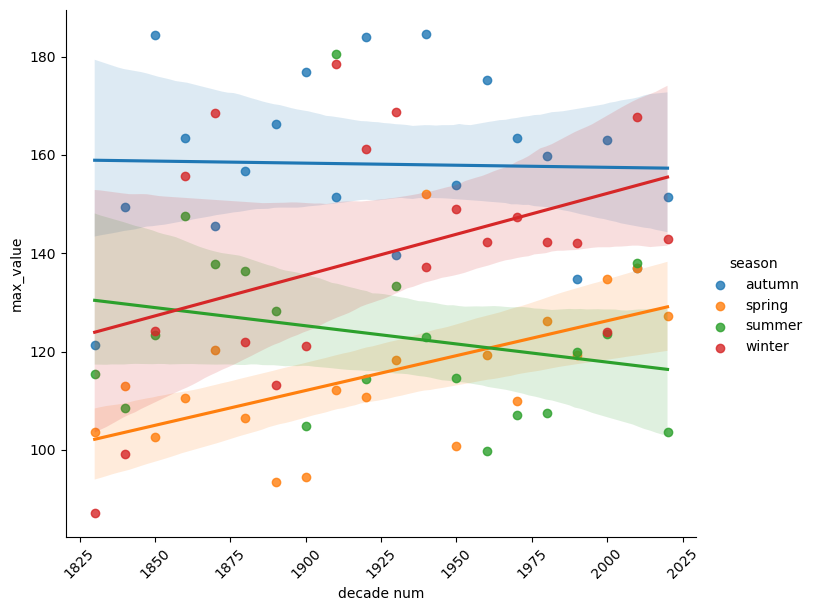

In [23]:
sns.lmplot(data=rainfall_decade_season, 
           x='decade num', 
           y='max_value', 
           hue='season', 
           height=6, aspect=1.2)
plt.xticks(rotation=45)
plt.show()

In [24]:
rainfall_per_year = (data_melt
                     .groupby('year')
                     .agg(mean_value=('value', 'mean'),
                          median_value=('value', 'median'),
                          std_value=('value', 'std'),
                          min_value=('value', 'min'),
                          max_value=('value', 'max')
                          )
                          ).reset_index()
rainfall_per_year

,year,mean_value,median_value,std_value,min_value,max_value
0,1836,68.625000,61.80,29.269380,16.1,121.3
1,1837,56.933333,56.80,20.707106,23.3,93.1
2,1838,58.591667,53.85,26.424591,19.6,119.1
3,1839,73.933333,72.45,30.584320,27.5,116.3
4,1840,50.875000,49.90,31.935478,7.9,119.7
...,...,...,...,...,...,...
185,2021,67.191667,62.10,35.869649,10.3,122.3
186,2022,59.158333,45.90,39.801952,10.7,151.5
187,2023,82.750000,78.10,41.641446,9.3,146.9
188,2024,81.366667,77.85,35.730362,24.8,144.4


### Dataset

### MuZiK